## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
comm_df = pd.read_csv('ab_data.csv')
comm_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
rows = comm_df.shape[0]
print('The dataset has '+ str(rows) + ' records.')

The dataset has 294478 records.


c. The number of unique users in the dataset.

In [4]:
unq_usrs = comm_df['user_id'].nunique()
print('The dataset has '+ str(unq_usrs) + ' unique users.')

The dataset has 290584 unique users.


d. The proportion of users converted.

In [5]:
#Get dataframe of converted users.
cnvrt_usrs = comm_df.query('converted == 1').user_id.nunique()
print('The number of converted users is : ' + str(cnvrt_usrs))

The number of converted users is : 35173


In [6]:
#Compute the proportion of converted users.
prop_cnvrt_usrs = cnvrt_usrs / unq_usrs
print('The proportion of converted users is : ' + str(prop_cnvrt_usrs))

The proportion of converted users is : 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#Get the number of times new page and contol line up.
ctrl_new = comm_df.query('group != "treatment" and landing_page == "new_page"')
ctrl_new.shape[0]

1928

In [8]:
#Get the number of times old page and treatment line up.
trtmnt_old = comm_df.query('group != "control" and landing_page == "old_page"')
trtmnt_old.shape[0]

1965

In [9]:
#Compute number of times the new page and treatment don't match.
total = trtmnt_old.shape[0] + ctrl_new.shape[0]
print("The number of times the new_page and treatment don't match is : " + str(total))

The number of times the new_page and treatment don't match is : 3893


f. Do any of the rows have missing values?

In [10]:
#Check if there is missing values.
comm_df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

##### There is NO Missing Values in this dataset.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = comm_df[((comm_df['group']=='treatment') & (comm_df['landing_page']=='new_page')) | ((comm_df['group']=='control') & (comm_df['landing_page']=='old_page'))]

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
unq_usrs_id = df2['user_id'].nunique()
print("The number of unique user ids = " + str(unq_usrs_id))

The number of unique user ids = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#Check the number of repeated user_id in df2.
df2.duplicated(['user_id']).sum()

1

In [15]:
#Display the repeated user id.
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
#Display the whole roe of repeated user id.
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#Display number of df2's records before deleting the repeated user ID.
df2.shape[0]

290585

In [18]:
#Remove duplicate user id one record from the dataset.
df2 = df2.drop_duplicates(subset='user_id');

In [19]:
#Display number of df2's records after deleting the repeated user ID.
df2.shape[0]

290584

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
#The average of converted column.
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
#The average of converted control group.
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
#The average of converted treatment group.
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
#Get the number of individual with new_page landing page.
new_pg = df2.query('landing_page == "new_page"')
num_of_new_pg = new_pg['landing_page'].count()
num_of_new_pg

145310

In [24]:
#Compute the propability of individual with new_page landing page.
prop_new_pg = num_of_new_pg / df2.shape[0]
print("The probability that an individual received the new page = " + str(prop_new_pg))

The probability that an individual received the new page = 0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### As long as the test seems to be fair enough, regarding the outputs we found above that :
<ul>
    <li>50% of individuals recieved the new page.</li>
    <li> The probability of converted treatment group is 11.88% and the probability of converted control group is 12.03%. Note that the difference between both probabilities is 0.15% which I cannot consider as a robust evidence to choose the new page.</li>
    <li>As a conclusion, new treatment page does not lead to more conversions.</li>
</ul>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

##### The NULL hypothesis $($$H_{0}$$)$ : $p_{old}$ $ - $ $p_{new}$ >= 0

##### The ALTERNATIVE hypothesis $($$H_{1}$$)$ : $p_{old}$ $ - $ $p_{new}$ < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = df2['converted'].mean()
print("Conversion rate of new page under the NULL Hypothesis = " + str(p_new))

Conversion rate of new page under the NULL Hypothesis = 0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df2['converted'].mean()
print("Conversion rate of old page under the NULL Hypothesis = " + str(p_old))

Conversion rate of old page under the NULL Hypothesis = 0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df2.query('landing_page == "new_page"').shape[0]
print("The number of individuals in the treatment group = " + str(n_new))

The number of individuals in the treatment group = 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df2.query('landing_page == "old_page"').shape[0]
print("The number of individuals in the control group = " + str(n_old))

The number of individuals in the control group = 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([0,1],n_new, p = [p_new, 1-p_new])
new_page_converted.mean()

0.8809441882871103

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice([0,1],n_old, p = [p_old, 1-p_old])
old_page_converted.mean()

0.87907677905199832

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diff_mean = new_page_converted.mean() - old_page_converted.mean()
diff_mean

0.001867409235111972

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size = n_new, p = [p_new, (1 - p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size = n_old, p = [p_old, (1 - p_old)]).mean()
    conv_diff = new_page_converted - old_page_converted 
    p_diffs.append(conv_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

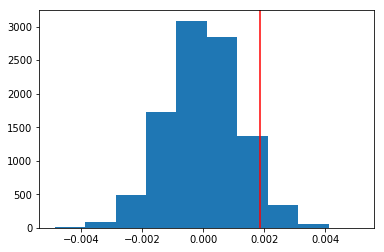

In [33]:
plt.hist(p_diffs);
plt.axvline(x= diff_mean, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
#Calculating the actual difference
act_diffs = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
act_diffs

-0.0015782389853555567

In [35]:
#Comparing both differences and calculates their mean value.
(p_diffs > act_diffs).mean()

0.90769999999999995

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

###### The value that we just computed above is represent the $P-value$ which is the probability of getting the results you did (or more extreme results) given that the NULL Hypothesis is true.
###### $P-value$ is equal to 0.9078 which means that 90.78% of the p_diffs are greater than act_diffs, because of that high proportion of $P-value$ we fail to reject the NULL Hypothesis and we don't have a sufficient evidence that the new_page has a higher conversion rate than the old_page .

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]
convert_old, n_old, convert_new, n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 145274, 17264, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_scr, p_val = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print("z-score = " + str(z_scr) + " , p-value = " + str(p_val))

z-score = 1.31092419842 , p-value = 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [38]:
#Calculating the critical z-score with 95% CI.
from scipy.stats import norm

cri_z_scr = norm.ppf(1-(0.05))
print("The critical z-score with 95% CI = " + str(cri_z_scr))

The critical z-score with 95% CI = 1.64485362695


##### Regarding our findings above, since $z-score$ (1.31) is less than $critical z-score$ (1.64) and the $p-value$ is equal to 0.90 (90%), we fail to reject the NULL Hypothesis so the conclusion here is same as the one we reach in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

##### Logistic Regression. (Yes/No) variable type.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
#Add intercept column.
df2['intercept'] = 1

#Create ab_page dummy column for group column.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df3: stats.chi2.sf(chisq, df3)
                                                   
log_mdl = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mdl.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        09:23:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

##### The $p-value$ associated with ab_page = 0.19 which leads us that the coefficient is not significan because it is greater than 0.05.
##### In this part of logistic regression the test was two-sided test $H_{1}$ : $P_{new}≠ P_{old}$ , but in Part II the test was one-sided  $H_{1}$ : $P_{new}> P_{old}$.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

##### Adding other factors to consider in our regression model is a good idea because is makes our decision more reliable and closer to reality. 

##### One of the drawbacks of consider more factors in regression model is that Simpson's paradox may occur also the decision making process will get more complicated regarding the type of factors that we will add.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [42]:
#Read countries data frame.
cntrs_df = pd.read_csv('countries.csv')
cntrs_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
#inner join both data frames.
join_df = cntrs_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
join_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
#Check possible values of countries.
join_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [45]:
#Create the dummy variables for countries column.
join_df[['CA', 'US']] = pd.get_dummies(join_df['country'])[['CA','US']]
join_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


In [53]:
#Applying regression model.
join_df['intercept'] = 1

lm = sm.Logit(join_df['converted'], join_df[['intercept','ab_page','CA','US']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Sep 2020   Pseudo R-squ.:               2.323e-05
Time:                        10:20:57   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

##### As long as the $P-value$ is greater than 0.05 in both Canda and US countries, so we can say that countries does not have a significant infulence on the conversion rate. As a result of this we still cannot reject NULL Hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [47]:
#calculating the conversion mean regarding country and landing page.
join_df.groupby(['country','ab_page'], as_index = False).mean()

,country,ab_page,converted,intercept,CA,US
0,CA,0,0.118783,1.0,1,0
1,CA,1,0.111902,1.0,1,0
2,UK,0,0.120022,1.0,0,0
3,UK,1,0.121171,1.0,0,0
4,US,0,0.120630,1.0,0,1
5,US,1,0.118466,1.0,0,1


In [49]:
join_df['ab_CA'] = join_df['ab_page'] * join_df['CA']
join_df['ab_US'] = join_df['ab_page'] * join_df['US']

join_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,ab_CA,ab_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,0,0


In [54]:
#Applying regression model for the interaction between page and country.
join_df['intercept'] = 1

lm = sm.Logit(join_df['converted'], join_df[['intercept','ab_page', 'CA','ab_CA', 'US','ab_US']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 12 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        10:21:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
ab_CA         -0.0783      0.057     -1.378      0.168      -0.190       0.033
US             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_US         -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

##### It seems similar to our findings before, the p-value for countries regarding the landing page is still greater than 0.05, it leads us that there is no significant evidence that countires (US, CA and UK) have a great influence in the convertion rate.

### Conclusion :

###### To sum up, regarding to statistical outcomes and A/B testing results, we cannot reject the NULL Hypothesis because of the lake of strong evidences which prove that the new page is better than the old page. This means that the old page is better than the new one. So, I think they have to keep website with the old page for now or try to develop a new one with the same basic features in the old page with much more enhancements and test both of them again.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [55]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0